# Homework 4

### Setup

In [1]:
import warnings
import pandas as pd
from scipy.io.arff import loadarff
from sklearn.preprocessing import MinMaxScaler

def warn(*args, **kwargs): pass
warnings.warn = warn

data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = MinMaxScaler().fit_transform(df.drop('class', axis=1))
y = df['class']

### 1.

In [12]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import contingency_matrix


def purity_score(y_true, y_pred):
    confusion_matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix) 

for k in range(2,6):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    y_pred = kmeans.labels_
    print(f"k={k} : Silhouette={silhouette_score(X, y_pred)}, purity={purity_score(y, y_pred)}")

k=2 : Silhouette=0.36044124340441114, purity=0.632258064516129
k=3 : Silhouette=0.29579055730002257, purity=0.667741935483871
k=4 : Silhouette=0.27442402122340176, purity=0.6612903225806451
k=5 : Silhouette=0.23823928397844843, purity=0.6774193548387096


### 2.

In [13]:
from sklearn.decomposition import PCA

pca = PCA().fit(X)

#### i.

In [14]:
explained_variability = np.sum(pca.explained_variance_ratio_[:2])*100
print(f"Variability explained by the top two principal components: {explained_variability}")

Variability explained by the top two principal components: 77.137397434354


#### ii.

In [15]:
comp1 = pca.components_[0]
comp2 = pca.components_[1]

columns = df.columns[:-1]
impt_features_comp1 = sorted([(columns[i], abs(comp1[i])) for i in range(len(columns))],key=lambda x : x[1], reverse=True)
impt_features_comp2 = sorted([(columns[i], abs(comp2[i])) for i in range(len(columns))],key=lambda x : x[1], reverse=True)

print("Input variables by relevance (component 1):\n")
for feature in impt_features_comp1:
    print(feature[0])

print("\n")

print("Input variables by relevance (component 2):\n")
for feature in impt_features_comp2:
    print(feature[0])

Input variables by relevance (component 1):

pelvic_incidence
lumbar_lordosis_angle
pelvic_tilt
sacral_slope
degree_spondylolisthesis
pelvic_radius


Input variables by relevance (component 2):

pelvic_tilt
pelvic_radius
sacral_slope
pelvic_incidence
lumbar_lordosis_angle
degree_spondylolisthesis


### 3.

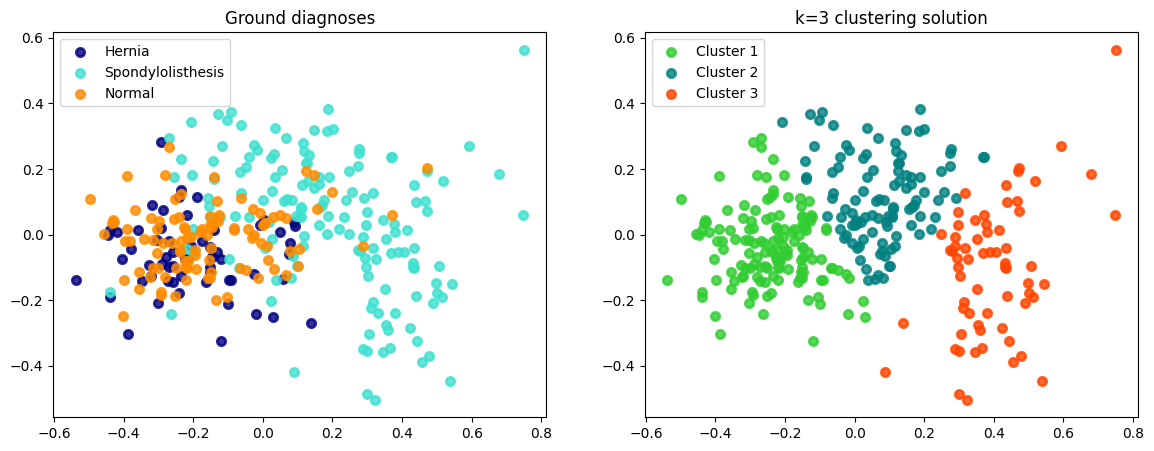

In [22]:
import matplotlib.pyplot as plt

y_pred = KMeans(n_clusters=3, random_state=0).fit(X).labels_
pca = PCA(n_components=2).fit_transform(X)
names = y.unique()
class_colors = ['navy', 'turquoise', 'darkorange']
num_colors = ['limegreen', 'teal', 'orangered']

plt.figure(figsize=(14, 5))
plt.subplot(121)
for color, name in zip(class_colors, names):
    plt.scatter(pca[y==name,0], pca[y==name,1], color=color, alpha=.8, lw=2, label=name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Ground diagnoses')

plt.subplot(122)
for color, i in zip(num_colors, [0, 1, 2]):
    plt.scatter(pca[y_pred==i,0], pca[y_pred==i,1], color=color, alpha=.8, lw=2, label=f"Cluster {i+1}")
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('k=3 clustering solution')

plt.show()


### 4.

Given the overall low silhouette and purity scores (question 1) and the significant overlap
between points of class Hernia and Normal (question 3), clustering does not seem to be a suitable
approach to characterize this dataset. Clustering only seems appropriate to use if we intend to distinguish
between data points of class Spondylolisthesis and of class Normal or Hernia (k = 2), but even then it does not
yield the best results (Silhouette = 0.36). Clustering may however be useful in terms of medical research. As
stated before, there's a significant overlap between points of class Hernia and class Normal, considering the two chosen
features. One might use clustering to identify the features that separate these two groups the best.